<a href="https://colab.research.google.com/github/Rajakumaran-S/Credit_Card_Default_Prediction_Capstone-Project_III/blob/main/Raja_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <font color=red>Project Title : Predicting whether a customer will default on his/her credit card </u></b>

---

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Rajakumaran S


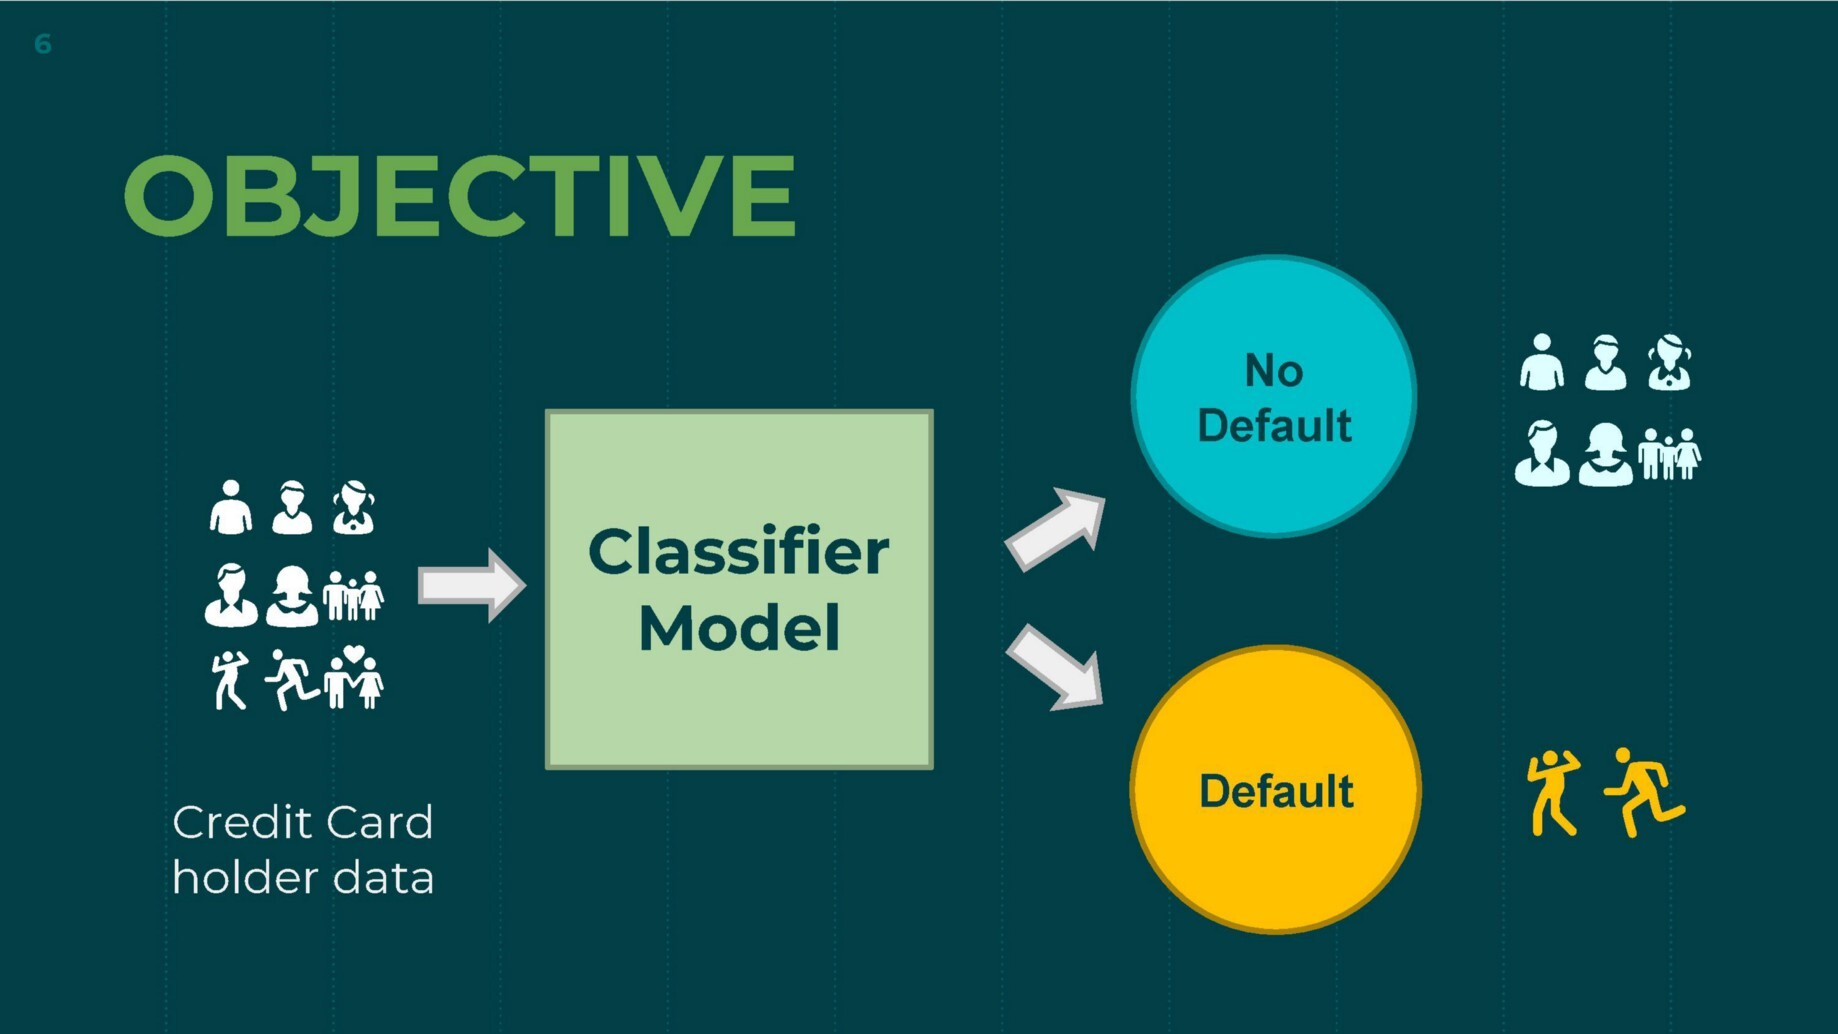

## **<font color=green>Project Summary Link**

## **<font color=green>GitHub Link** 
https://github.com/Rajakumaran-S/Credit_Card_Default_Prediction_Capstone-Project_III

## <b><font color=green>  Problem Statement </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b><font color=green>  Data Description </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## <b><font color=blue>1. Understanding of the data

### <font color=green>1.1 Import Libraries

In [1]:
#Importing all required Librarys:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### <font color=green>1.2 Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading Dataset:
df = pd.read_excel('/content/drive/MyDrive/Alma Better/default of credit card clients.xls', header = 1) 
#header: we are using 2nd row as our header

### <font color=green>1.3 Dataset First View

In [4]:
#Checking Sample data in thr dataset:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### <font color=green>1.4 Dataset Rows & Columns count
 
* There are 30,000 rows and 25 columns in the dataset

### <font color=green>1.5 Dataset Information

In [5]:
#Checking info of the Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## <font color=blue>2. Understanding Your Variables

In [6]:
#All columns in the dataset:
columns=df.columns
columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### <font color=green>2.1 Variables Description 

* ID: ID of each customer
* LIMIT_BAL: Amount of the given credit (NT dollar)
* SEX: Gender(Male = 1, Female: 2)
* EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
* PAY_0: Repayment status in September, 2005 (same scale as given)
* PAY_2: Repayment status in August, 2005 (same scale as given)
* PAY_3: Repayment status in July, 2005 (same scale as given)
* PAY_4: Repayment status in June, 2005 (same scale as given)
* PAY_5: Repayment status in May, 2005 (same scale as given)
* PAY_6: Repayment status in April, 2005 (same scale as given)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default payment next month: Default Payments(1 = Yes, 0 = No)

We have been provided with 6 months credit card transaction history along with the informative details of customer and their current status, on the basis of this dataset we have to predict either he/she is a defaulter or not if he/she possess with these qualities.

In [7]:
# Rename the names of features according to the description, 
# it will make our task easy in Exploratoy data analysis and in further appoaches.
df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG','PAY_3':'REPAY_JULY','PAY_4':'REPAY_JUNE','PAY_5':'REPAY_MAY','PAY_6':'REPAY_APRIL',
                    'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL',
                    'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL',
                    'default payment next month': 'Default_Payments'},inplace = True)

In [8]:
#Describe the dataset:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
#all columns in the datadset
columns=df.columns
columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Default_Payments'],
      dtype='object')

### <font color=green><b>2.2 Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
for col in columns:
    print(col)
    print('No of Unique values: ',df[col].nunique())
    print(df[col].unique())
    print('-'*80)

ID
No of Unique values:  30000
[    1     2     3 ... 29998 29999 30000]
--------------------------------------------------------------------------------
LIMIT_BAL
No of Unique values:  81
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
--------------------------------------------------------------------------------
SEX
No of Unique values:  2
[2 1]
--------------------------------------

### <font color=red> Observation:

* There are 30000 rows and 25 columns(Features) in the dataset
* our target variable is 'default payment next month'

## <font color=blue>3. Data Wrangling

### <font color=green>3.1 Checking Duplicated data

In [11]:
#Checking duplicates in the dataset:
print(len(df[df.duplicated()]))

0


### <font color=green>3.2 Checking Null Values
* From the df.info, we can see there is no null values in the dataset

### <font color=green>3.3 Drop Unwanted Columns

In [12]:
#Drop ID Column
df.drop(columns='ID',inplace=True)

### <font color=green>3.4 Identifying Outliers in the dataset

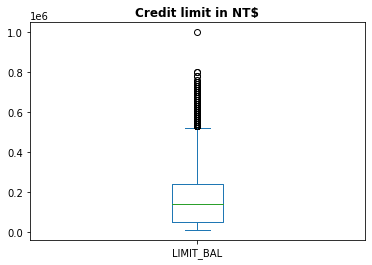

In [13]:
# Using boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.title('Credit limit in NT$', fontweight='bold')
plt.show()

In [14]:
# Taking a close look at the outlier with a value of 1 MILLION NT DOLLARS
# The observations from other columns indicate that this was just ONE CUSTOMER who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
2197,1000000,2,1,1,47,0,0,0,-1,0,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


### <font color=green>3.5 Making Columns data correction according to data

####  <font color=gray>Education Column

In [15]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
# In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others
df['EDUCATION']=df['EDUCATION'].apply(lambda x :4 if x in [0,4,5,6]  else x)      

In [17]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### <font color=gray>Marriage Column

In [18]:
# Value count of Marital_status Column, 
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [19]:
# in data 1= Married; 2=single; we making 3 and 0 as 'Others=0'
df['MARRIAGE']=df['MARRIAGE'].apply(lambda x :3 if x in [0,3]  else x)  

In [20]:
# Value count of Marital_status Column, 
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#### <font color=gray> Repayment Status Column

In [21]:
# Defining function for all Repayments status value less than 0 consider as 0
def repayment(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [22]:
# Apply function on Repayments status columns
for i in df[['REPAY_SEPT','REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL']].columns:
    df[i]=df[i].apply(repayment)

### <font color=red>Observation:
   
* there is no null values and duplicates values in the dataset.
* we droped 'ID' Column because ID column will not affect target variable.Dropped the unnmaned column
* With help of box plot we found outlier Bal_limit of 100000 of one customer. the data is valid customer data. so we are not removed data from the dataset
* In data given values are 1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others.
* In marital status the given values are 1 = married; 2 = single; 3 = others and 0 is not given in data, we include them on  others as 0
* In the repayment column, we have not given information about 0 and -2 values so we placed less then zero value to 0.
   

## <font color=blue>***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### <font color=green> 4.1 Target Variable

In [23]:
df['Default_Payments'].value_counts().sort_index()

0    23364
1     6636
Name: Default_Payments, dtype: int64

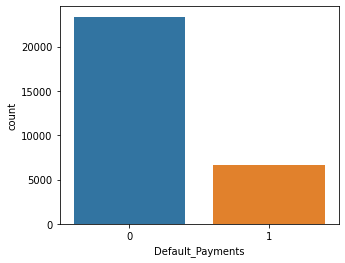

In [24]:
#check target variable value proportion Using Univaraiate analysis
plt.figure(figsize=(5,4))
sns.countplot(x = 'Default_Payments', data = df)

In [25]:
#Checking percentage of defaulter
df['Default_Payments'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Default_Payments, dtype: float64

### <font color=red>Observation:
* we have a imbalanced of a target variable in the dataset
* 22% of customers has default payment next month 

### <font color=green>4.2 Independent Variable:

In [26]:
#Continious columns in the dataset
con_columns=df.columns[11:23]
con_columns

Index(['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL'],
      dtype='object')

In [27]:
#Categorical columns
cat_columns=df.columns[0:11]
cat_columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL'],
      dtype='object')

### <font color=gold>4.2.1  Is the proportion of defaults the same for men and women?

In [28]:
# Sex vs deafault payment
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [29]:
default_sex_crosstab = pd.crosstab(df['Default_Payments'],df['SEX'],margins=True,normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 2 : 'Female'}

default_sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_sex_crosstab

SEX,Male,Female,All
Default_Payments,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


In [30]:
default_sex_crosstab_norm =  default_sex_crosstab / default_sex_crosstab.loc['All']
default_sex_crosstab_norm

SEX,Male,Female,All
Default_Payments,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


### Observation:
* As per data, we have 11888 customers of male and 18112 customers of female
* male customers are the most no of default compared to the female customers.

[Text(0.5, 1.0, 'Relationship between Age and Defaulters')]

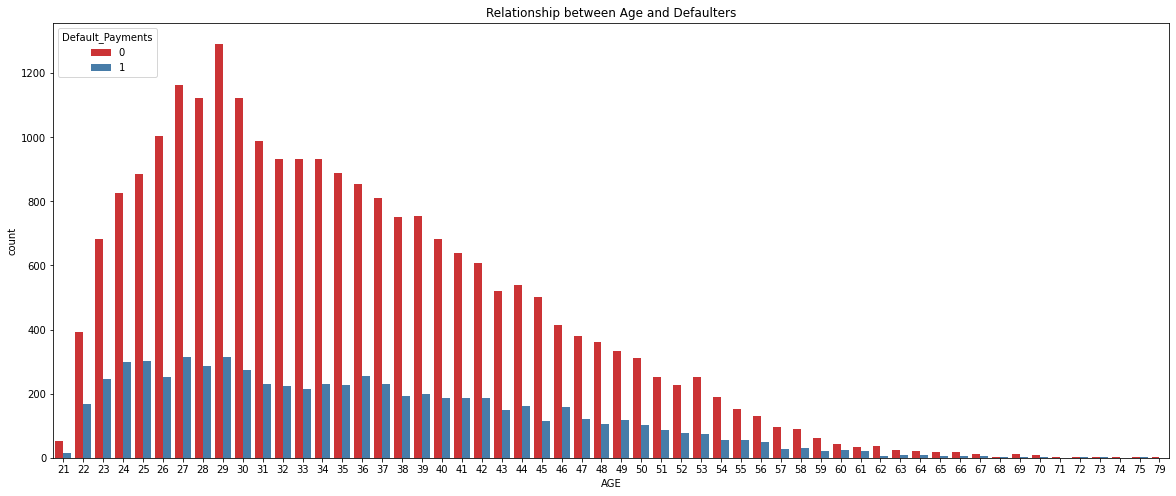

In [31]:
# Default with respect their Age
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(x = df['AGE'], hue = 'Default_Payments', data = df,palette = "Set1")
ax.set(title = 'Relationship between Age and Defaulters')

* 20 to 45 year age customers are the average default customers.
* age above 60 years are mostly default customers

### <font color=gold>4.2.2 Did customers with a high education level get higher credit limits?


In [32]:
# Education
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

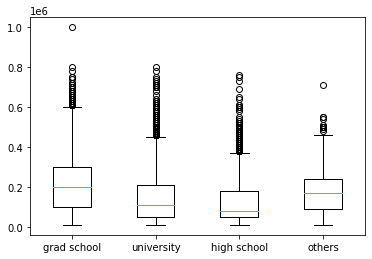

In [33]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [1,2,3,4]:
    temp = df.loc[df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["grad school", "university", "high school","others"])

plt.show()

### <font color=red> Observation:
* From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

<font color=gray>Marriage Column:

In [34]:
# Marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

There is another thing that need to be done here, we have to change the classification denotion from 0,1,2,3 to a reasonable class that they actually tells us in the data description for e.g.,

Sex: (1 = Male,0 = Female)

So, we have to this with all the three categorical features.

### <font color=gold>4.2.3 Replace numerical value to categorical original valid name to do EDA:

In [35]:
#making copy of data to do EDA
df_cat=df.copy()
df_cat

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [36]:
# Now replace the classification denotion 
df_cat['SEX_cat']=df['SEX'].replace({1 : 'Male',2 : 'Female'})
df_cat['EDUCATION_cat']=df['EDUCATION'].replace({1 : 'Graduates',2 : 'University',3 : 'High School',4 : 'Others'})
df_cat['MARRIAGE_cat']=df['MARRIAGE'].replace({1 : 'Married',2 : 'Single',3 : 'Others'})
df_cat['Default_Payments_cat']=df['Default_Payments'].replace({0:'default',1:'Not default'})
df_cat=df_cat.iloc[:,24:]
df_cat

,SEX_cat,EDUCATION_cat,MARRIAGE_cat,Default_Payments_cat
0,Female,University,Married,Not default
1,Female,University,Single,Not default
2,Female,University,Single,default
3,Female,University,Married,default
4,Male,University,Married,default
...,...,...,...,...
29995,Male,High School,Married,default
29996,Male,High School,Single,default
29997,Male,University,Single,Not default
29998,Male,High School,Married,Not default


#### <font color=gray>**Plotting all these Categorical features with Dependent variable** 


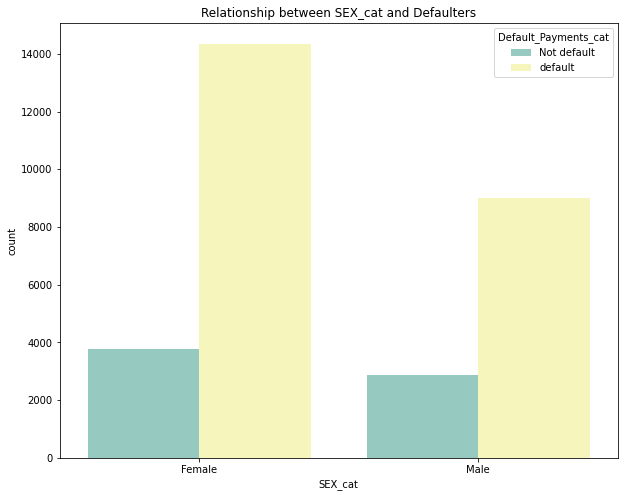

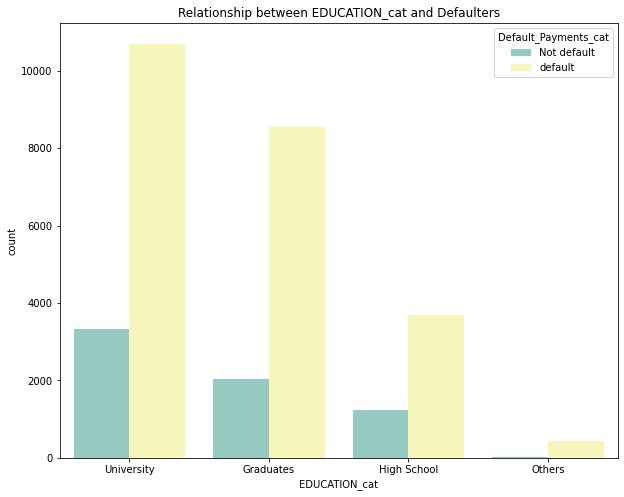

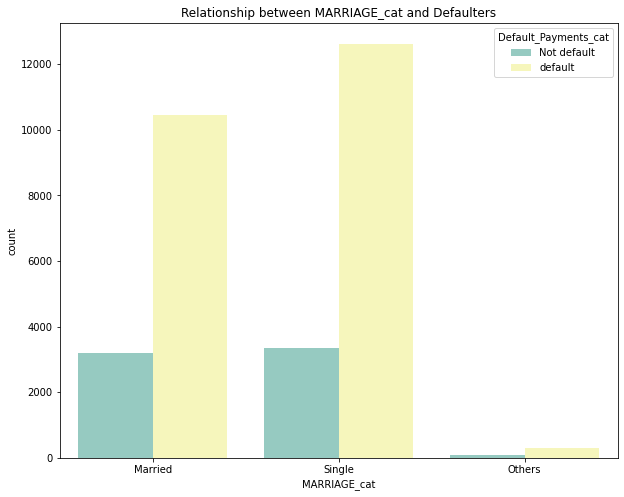

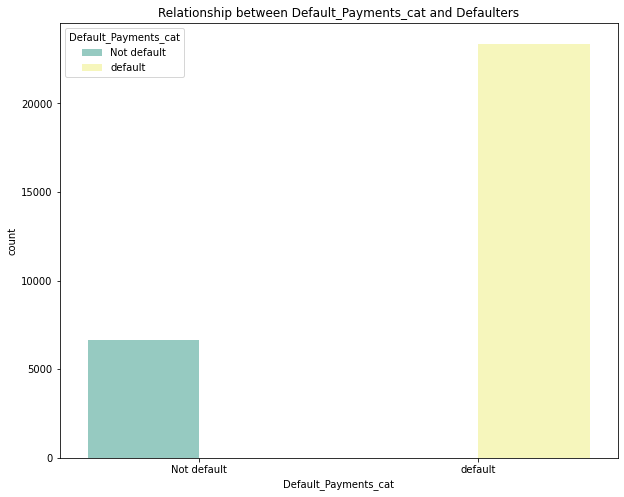

In [37]:
# categorical features with dependent variable 
for col in df_cat.columns:
  fig, ax = plt.subplots(figsize = (10,8))
  sns.countplot(x = col, hue = 'Default_Payments_cat', data = df_cat,palette = "Set3")
  ax.set(title = 'Relationship between ' +col+ ' and Defaulters')

### <font color=red>Observation:

* Females have the majority holding of cred cards in comparison to males but ratio of defaulters is high in Males.
* University and Graduates are holding high proportions of Credit cards.
* Singles and Married have proportion of credit cards according to the countplot singles have more numbers in defaulters.

### <font color=gold>**4.2.4 Repayment Histrory According to Months with Default Payments**
---

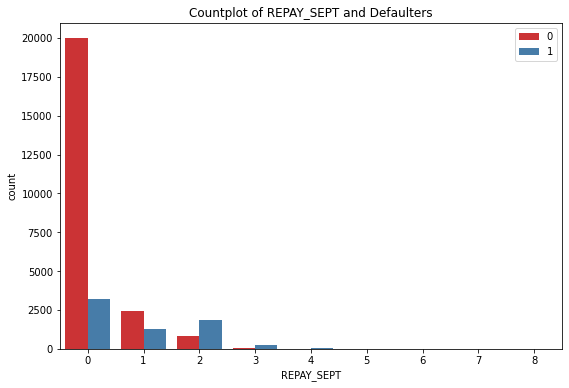

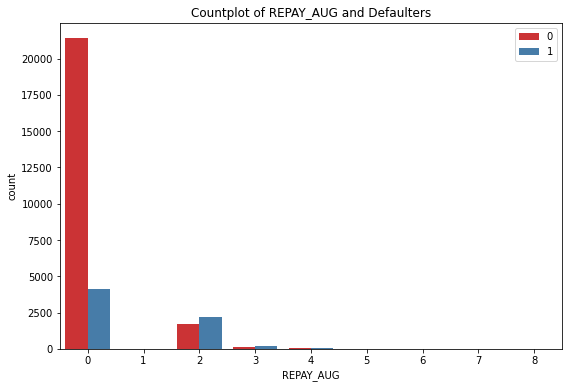

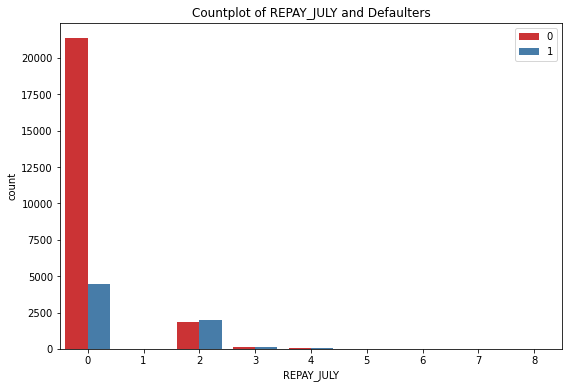

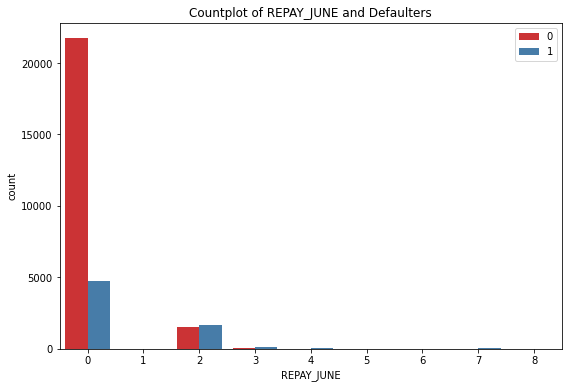

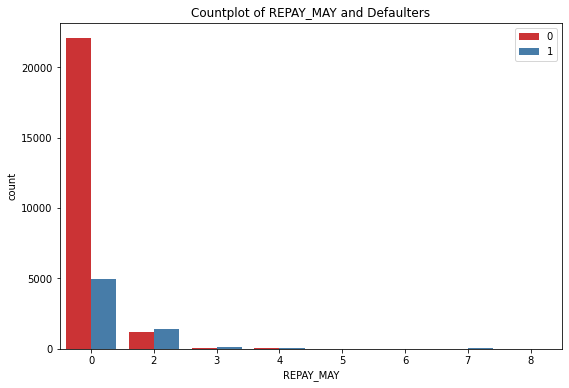

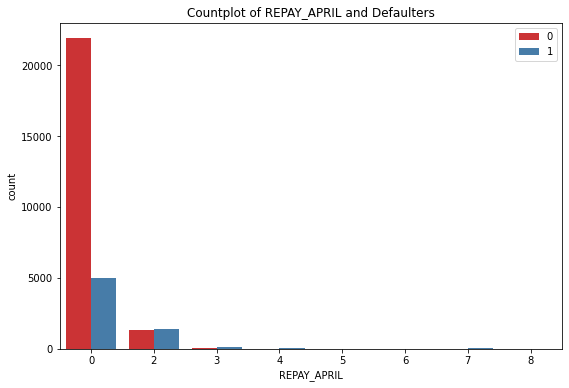

In [38]:
# Amount paid in different months 
pay_scale = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL']
for col in pay_scale:
  fig, ax = plt.subplots(figsize = (9,6))
  sns.countplot(x = col, hue = 'Default_Payments',data = df,palette = 'Set1')
  ax.legend(loc = 'upper right')
  ax.set(title = 'Countplot of '+col+' and Defaulters')
  

### Describing the Xlabel of Repay scale

-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

---
### Conclusion:
* From the repayment of 6 month data, most of the default and not default customer have paid atleast minimum.


### <font color=gold>**4.2.5 Continous Independent Features with Dependent Variable**
---

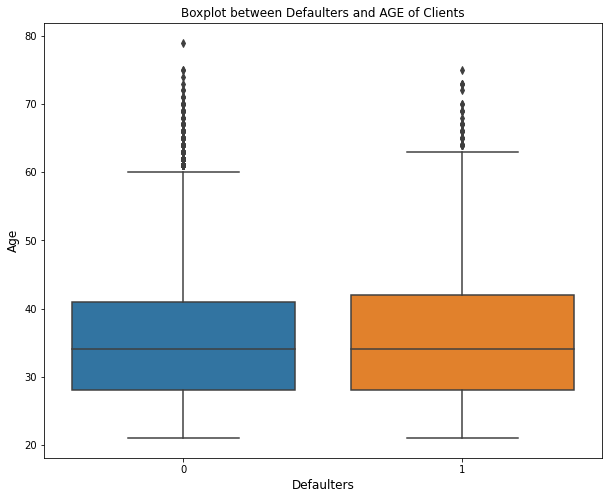

In [39]:
# Boxplot AGE vs Defaulters
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Default_Payments',y = 'AGE',data = df)
plt.title('Boxplot between Defaulters and AGE of Clients')
plt.xlabel('Defaulters',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
plt.show()

* Median shows that our poplutaion of defaulters and not defaulters are around 35 years
* Two many outliers are above the ages of 60 years in both classification. It means old-age people may be defaulters.

Text(0, 0.5, 'Counts of defaulters')

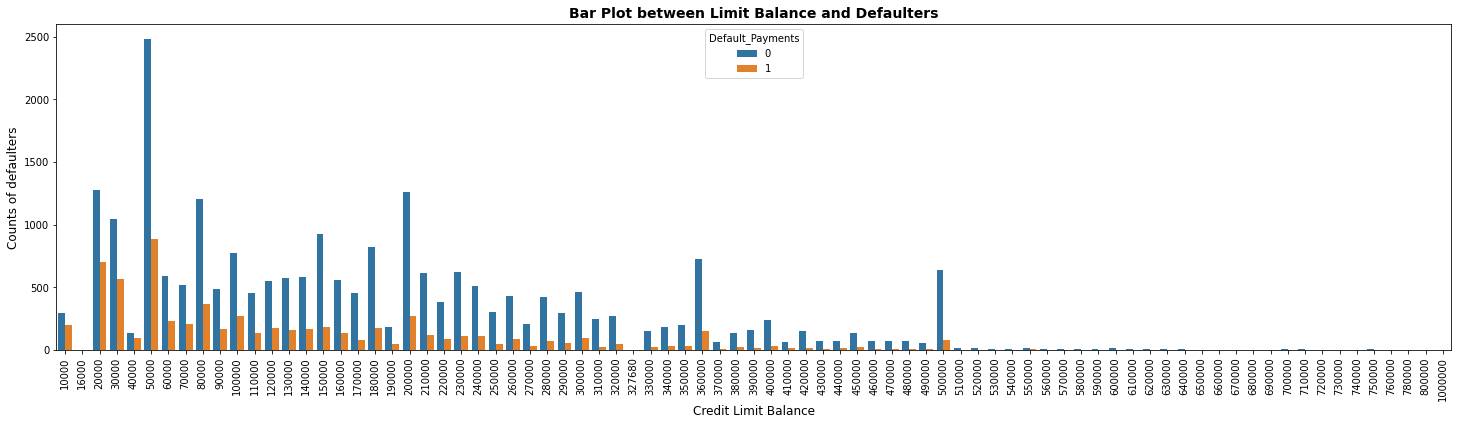

In [40]:
# Limit Balance 
plt.figure(figsize = (25,6))
sns.countplot(x = 'LIMIT_BAL',hue = 'Default_Payments',data = df)
plt.xticks(rotation = 90)
plt.title('Bar Plot between Limit Balance and Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Counts of defaulters',fontsize = 12)

* Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
* After the credit limit 5,00,000, number of defaulters are almost negligible.

### <font color=gold>**4.2.6 Lets Visualize the rest features of bill payments and amount of previous payments of different months**

### <font color=gray>**Defaulter According to Bill Payments**

In [41]:
# Having just overview of mean of bill payments of defaulters
bill_amt = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL']
df.groupby('Default_Payments')[bill_amt].mean()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


* Defaulters do not have average bill payment amount not more than 49,000(NT Dollar)
* The most concerned area about the defaulters are around the average bill amount. 


### <font color=gray>**Defaulter According to Payment Amount**

---

In [42]:
#Let's have a look at mean of  previous payment of different months 
pay_amt = ['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
df.groupby("Default_Payments")[pay_amt].mean()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


* Defaulters do not have average previous bill payment amount not more than 3500(NT Dollar)
* The most concerned area about the defaulters are around the average previous bill payment amount.


### <font color=gold>**4.2.7 Checking Correlation Between Columns**


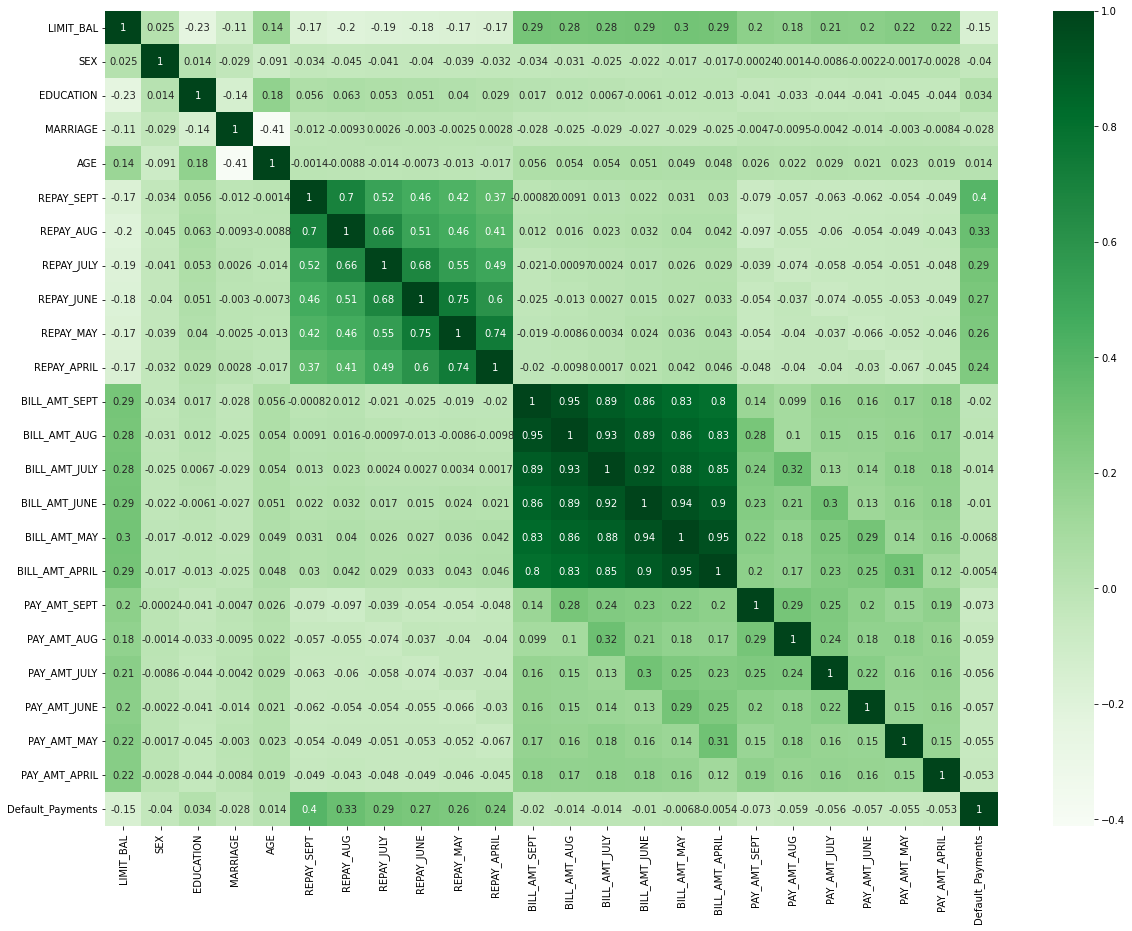

In [43]:
#Checking correlation between columns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

Here Bill amount of 6 month features are correlated with each other  but this important feature of customer so we cant delete those features.

## <font color=blue>5. Hypothesis Testing
---

### <font color=green> 5.1 Correlation between credit limit and payment default.
* Ideally, we should have customers' income data, but since this data is not available, we can assume higher income customers have higher credit limits. Therefore, we will verify if there is a correlation between credit limit and default payment using t-test.

* Null hypothesis: credit limit does not affect default likelihood.
* Alternative hypothesis: credit limit impact default likelihood.
* Set significance level  to 0.05

In [44]:
no_def_limit = df.loc[df['Default_Payments']==0,'LIMIT_BAL']
def_limit = df.loc[df['Default_Payments']==1,'LIMIT_BAL']

In [45]:
from scipy import stats
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))

Ttest_indResult(statistic=26.90935759020854, pvalue=1.2739158026091975e-157)

We get a p value as 0, therefore we need to reject the null hypothesis and accept the alternative hypothesis. Credit limit has an impact on payment default.

### <font color=green>5.2 Correlation between education and payment default.
* Is education impacts default likelihood?. We will use a Chi-squared test to verify this finding.

* Null hypothesis: education does not affect default likelihood.
* Alternative hypothesis: education impacts default likelihood.
* Set significance level  to 0.05

In [46]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default_Payments'], df['EDUCATION'], margins=False)

In [47]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

1.495064564810615e-34

Since the p value is close to 0, we will reject the null hypothesis and accept the alternative hypothesis. Because education has a strong correlation with default probability, we should keep this variable in the machine learning model.

### <font color=green>5.3 Correlation between age and payment default.
* Is age impacts default likelihood?. We will use a chi-squared test to verify this finding.

* Null hypothesis: age does not affect default likelihood.
* Alternative hypothesis: age impacts default likelihood.
* Set significance level  to 0.05

In [48]:
# Get the contigence table of age and default data

age_def_contigence = pd.crosstab(df['Default_Payments'], df['AGE'], margins=False)

In [49]:
# Use chi-squared test to test if age affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(age_def_contigence)

p

5.6429915495725416e-12

The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis, which is age has impact on default probability.

## <font color=blue>6. Feature Engineering & Data Pre-processing
---

### <font color=green>6.1 One Hot Encoding

In [50]:
# Independent features making a copy of dataset 
cred_dup_df = df.copy().drop(columns='Default_Payments')
cred_dup_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,...,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
0,20000,2,2,1,24,2,2,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,0,0,0,0,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,0,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [51]:
# Transform features Marriage, Age and Education using one-hot-encoding
cred_dup_df = pd.get_dummies(cred_dup_df,columns = ['EDUCATION','SEX','MARRIAGE'])


In [52]:
# renaming columns to get better understanding about dummy variables
cred_dup_df.rename(columns = {'EDUCATION_1':'EDUCATION_GRADUATE','EDUCATION_2':'EDUCATION_UNIVERSITY','EDUCATION_3':'EDUCATION_HIGH_SCHOOL','EDUCATION_4':'EDUCATION_OTHERS',
                              'SEX_1':'MALE','SEX_2':'FEMALE','MARRIAGE_1':'SINGLE','MARRIAGE_2':'MARRIED','MARRIAGE_3':'MARRIAGE_OTHERS'},inplace = True)
cred_dup_df.head(3)

,LIMIT_BAL,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,REPAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,...,PAY_AMT_APRIL,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,MALE,FEMALE,SINGLE,MARRIED,MARRIAGE_OTHERS
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,1,0,0,0,1,1,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,2000,0,1,0,0,0,1,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,1,0,0,0,1,0,1,0


In [53]:
#Final independent features
cred_dup_df.columns

Index(['LIMIT_BAL', 'AGE', 'REPAY_SEPT', 'REPAY_AUG', 'REPAY_JULY',
       'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY',
       'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY',
       'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'EDUCATION_GRADUATE',
       'EDUCATION_UNIVERSITY', 'EDUCATION_HIGH_SCHOOL', 'EDUCATION_OTHERS',
       'MALE', 'FEMALE', 'SINGLE', 'MARRIED', 'MARRIAGE_OTHERS'],
      dtype='object')

In [54]:
# independent variable and dependent variable
X=cred_dup_df
y=df['Default_Payments']

### <font color=green>6.2 Scaling independent variables

In [55]:
#Scaling independent variables data
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

### <font color=green>6.3 Handelling Imbalance Dataset with SMOTE

In [56]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', y.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X,y)

print('\nDataset After:\n',y_train_smt.value_counts())

Dataset Before:
 0    23364
1     6636
Name: Default_Payments, dtype: int64

Dataset After:
 1    23364
0    23364
Name: Default_Payments, dtype: int64


### <font color=green>**6.4 Splitting *X* and *y* into Training and Testing Dataset**

In [57]:
X_train, X_test,y_train, y_test = train_test_split(X_train_smt,y_train_smt,test_size = 0.3,random_state = 0)

In [58]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (32709, 29)
Shape of y_train: (32709,)
Shape of X_test: (14019, 29)
Shape of y_test: (14019,)


## <font color=blue>***7. ML Model Implementation***



### <font color=green>7.1 Without Hyperparameter Tuning

In [59]:
#import required ML models library:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Creating dict of clasification model without hyper parameter
models = {
    LogisticRegression(): "    Logistic Regression",
    SVC():                 "Support Vector Machine",
    KNeighborsClassifier():                   'KNN',
    RandomForestClassifier():        'RandomForest',
    XGBClassifier():                'XGBClassifier'
}
# fitting all model using loop 
for model in models.keys():
    model.fit(X_train, y_train)

In [60]:
#create a function to calculate evaluation matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
eval_score=[]
def get_score(model,y_true, y_pred):
    score={} #creating empty dict for storing model and score of the model
    score['Model']=model
    score['accuracy']= round(accuracy_score(y_true,y_pred)*100,2)
    score['precision'] = round(precision_score(y_true,y_pred)*100,2)
    score['recall'] = round(recall_score(y_true,y_pred)*100,2)
    score['f1_score_'] = round(f1_score(y_true,y_pred)*100,2)
    score['roc_auc_score'] = round(roc_auc_score(y_true,y_pred)*100,2)
    eval_score.append(score) #appending dict into list (list of dict)
def result():
    return pd.DataFrame(eval_score) #creating list of dict into pandas dataframe

def get_cm(y_true, y_pred):
  # Get the confusion matrix for both train and test
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  labels = ['Not Defaulter', 'Defaulter']
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
    
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [61]:
#predicting train and test data and get model score:
print('ML Model Implementation without Hyperparameter Tuning')
for model, name in models.items():
    y_pred_lr_train = model.predict(X_train)
    y_pred_lr_test = model.predict(X_test)
    get_score(str(name)+'_train',y_train, y_pred_lr_train)
    get_score(str(name)+'_test',y_test, y_pred_lr_test)
result()  # calling function for get score of all metrices

ML Model Implementation without Hyperparameter Tuning


,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.30,78.14,56.08,65.29,70.25
1,Logistic Regression_test,69.93,77.84,56.40,65.41,70.04
2,Support Vector Machine_train,72.53,77.90,62.63,69.43,72.49
3,Support Vector Machine_test,71.40,76.72,62.12,68.65,71.48
4,KNN_train,84.78,79.52,93.55,85.97,84.81
5,KNN_test,76.42,72.00,87.11,78.84,76.34
6,RandomForest_train,99.97,99.98,99.96,99.97,99.97
7,RandomForest_test,84.56,86.44,82.27,84.30,84.58
8,XGBClassifier_train,79.58,84.98,71.68,77.76,79.55
9,XGBClassifier_test,78.33,83.55,70.99,76.76,78.39


### <b> <font color=red>  Observation
* we are applied normal classification without any hyper parameter tuning. we got
* best result from Logistic Regression of precision of 78% and recal value of 56%, XGB Classifier also have the good result of precision of 83% and recal of 71%.
* remaining model of KNN and Random forest overfitting with training dataset.
* SVC gives best result as well.
* lets do Hyperparameter tuning with Cross validation. then decide best model.

### <font color=green>7.2 Cross - Validation & Hyperparameter Tuning

### <font color=blue> Logistic Regression

In [62]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [63]:
# Best parameters 
logistic_grid_model.best_params_   

{'C': 0.0001, 'penalty': 'l2'}

In [64]:
#best score
logistic_grid_model.best_score_

0.796654373619161

In [65]:
#prediction
y_pred_lr_train = logistic_grid_model.predict(X_train)
y_pred_lr_test = logistic_grid_model.predict(X_test)

In [66]:
#evaluation matrix on train data and Testing data
get_score('Logistic_train_hyper',y_train, y_pred_lr_train)
get_score('Logistic_test_hyper',y_test, y_pred_lr_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.30,78.14,56.08,65.29,70.25
1,Logistic Regression_test,69.93,77.84,56.40,65.41,70.04
2,Support Vector Machine_train,72.53,77.90,62.63,69.43,72.49
3,Support Vector Machine_test,71.40,76.72,62.12,68.65,71.48
4,KNN_train,84.78,79.52,93.55,85.97,84.81
5,KNN_test,76.42,72.00,87.11,78.84,76.34
6,RandomForest_train,99.97,99.98,99.96,99.97,99.97
7,RandomForest_test,84.56,86.44,82.27,84.30,84.58
8,XGBClassifier_train,79.58,84.98,71.68,77.76,79.55
9,XGBClassifier_test,78.33,83.55,70.99,76.76,78.39


[[5935 1017]
 [3234 3833]]


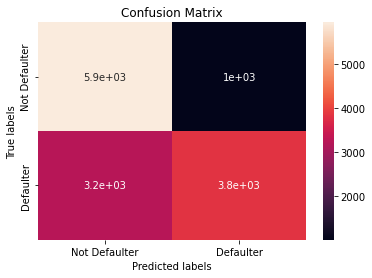

In [67]:
#confusion matrix for test data:
get_cm(y_test, y_pred_lr_test)

with hyperparameter tuning some improvement in the testing precision of 78%.

###  <font color=blue>K - Nearest Neibour (KNN)

In [68]:
#fit the parameter
param_grid = {'n_neighbors' : [3,4]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, verbose = 3, cv = 4)
#training model
knn.fit(X_train, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4]}, verbose=3)

In [69]:
#best parameter of gridsearchcv
knn.best_params_

{'n_neighbors': 3}

In [70]:
#prediction
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [71]:
#evaluation matrix on train data
get_score('knn_train_hyper',y_train, y_pred_knn_train)
get_score('knn_test_hyper',y_test, y_pred_knn_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.30,78.14,56.08,65.29,70.25
1,Logistic Regression_test,69.93,77.84,56.40,65.41,70.04
2,Support Vector Machine_train,72.53,77.90,62.63,69.43,72.49
3,Support Vector Machine_test,71.40,76.72,62.12,68.65,71.48
4,KNN_train,84.78,79.52,93.55,85.97,84.81
5,KNN_test,76.42,72.00,87.11,78.84,76.34
6,RandomForest_train,99.97,99.98,99.96,99.97,99.97
7,RandomForest_test,84.56,86.44,82.27,84.30,84.58
8,XGBClassifier_train,79.58,84.98,71.68,77.76,79.55
9,XGBClassifier_test,78.33,83.55,70.99,76.76,78.39


[[4701 2251]
 [ 744 6323]]


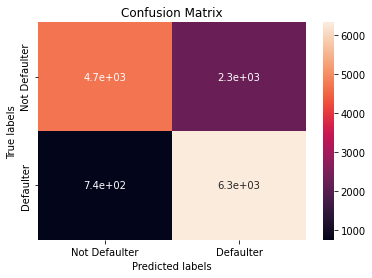

In [72]:
#confusion matrix
get_cm(y_test, y_pred_knn_test)

with hyper parameter tuning on KNN. it's getting overfitting with training model.

### <font color=blue> Random Forest

---

In [73]:
#fit the parameter
rf_clf = RandomForestClassifier()
param_grid = {'n_estimators' : [50,80,100],'max_depth' : [6,7,8]}

rf_grid = GridSearchCV(rf_clf, param_grid, n_jobs=-1, cv=4)

In [74]:
# Fit grid search to the data
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [75]:
#prediction
y_pred_rf_train = rf_grid.predict(X_train)
y_pred_rf_test = rf_grid.predict(X_test)

In [76]:
#evaluation matrix on train data and test data
get_score('Random Forest_train_hyper',y_train, y_pred_rf_train)
get_score('Random Forest_test_hyper',y_test, y_pred_rf_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.30,78.14,56.08,65.29,70.25
1,Logistic Regression_test,69.93,77.84,56.40,65.41,70.04
2,Support Vector Machine_train,72.53,77.90,62.63,69.43,72.49
3,Support Vector Machine_test,71.40,76.72,62.12,68.65,71.48
4,KNN_train,84.78,79.52,93.55,85.97,84.81
5,KNN_test,76.42,72.00,87.11,78.84,76.34
6,RandomForest_train,99.97,99.98,99.96,99.97,99.97
7,RandomForest_test,84.56,86.44,82.27,84.30,84.58
8,XGBClassifier_train,79.58,84.98,71.68,77.76,79.55
9,XGBClassifier_test,78.33,83.55,70.99,76.76,78.39


with hyper parameter tuning in randomforest we got the best result of precision 79%. still now its the best result.

[[5720 1232]
 [2302 4765]]


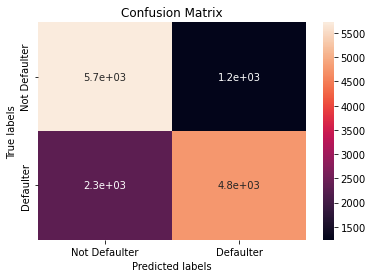

In [77]:
#confusion matrix
get_cm(y_test, y_pred_rf_test)

### <font color=blue> XG Boosting

---

In [78]:
# import xgboost
from xgboost import XGBClassifier

In [79]:
#Hyper Parameter Tuning using grid search Cross Validation to find best paramter
parameter_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,8],
              'min_samples_split' : [50,100],
              'min_samples_leaf' : [40,50]}
# Create an instance of the XG Boost Regressor
xg_boost =XGBClassifier()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 3, verbose=2)

xg_grid.fit(X_train,y_train)
xg_grid.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV] END max_depth=4, min_s

XGBClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [80]:
# train and test prediction
y_pred_xgb_train = xg_grid.predict(X_train)
y_pred_xgb_test = xg_grid.predict(X_test)

In [81]:
#evaluation matrix on train data and Testing data
get_score('XG Boosting Train_hyper',y_train, y_pred_xgb_train)
get_score('XG Boosting Test_hyper',y_test, y_pred_xgb_test)
result()

,Model,accuracy,precision,recall,f1_score_,roc_auc_score
0,Logistic Regression_train,70.30,78.14,56.08,65.29,70.25
1,Logistic Regression_test,69.93,77.84,56.40,65.41,70.04
2,Support Vector Machine_train,72.53,77.90,62.63,69.43,72.49
3,Support Vector Machine_test,71.40,76.72,62.12,68.65,71.48
4,KNN_train,84.78,79.52,93.55,85.97,84.81
5,KNN_test,76.42,72.00,87.11,78.84,76.34
6,RandomForest_train,99.97,99.98,99.96,99.97,99.97
7,RandomForest_test,84.56,86.44,82.27,84.30,84.58
8,XGBClassifier_train,79.58,84.98,71.68,77.76,79.55
9,XGBClassifier_test,78.33,83.55,70.99,76.76,78.39


[[6299  653]
 [1305 5762]]


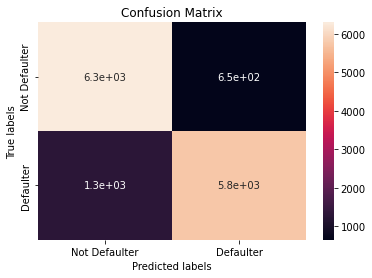

In [82]:
#confusion matrix
get_cm(y_test, y_pred_xgb_test)

with hyper parameter tuning in XG boosting Classifier. we got the best testing result of precision 90%. the best result of the all model. we can go with this model.
* lets see KS Statistic value then decide

## <font color=blue>8. Predicting and Ploting KS Statistic 

In [83]:
#installing scikit-plot
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


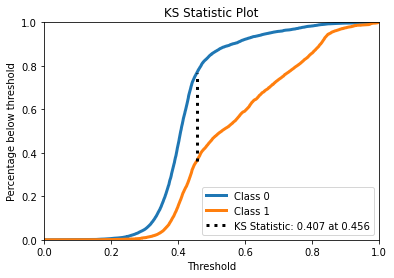

In [84]:
#Logistic Regression - ks_statistic
import scikitplot as skplt
target_proba = logistic_grid_model.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, target_proba)

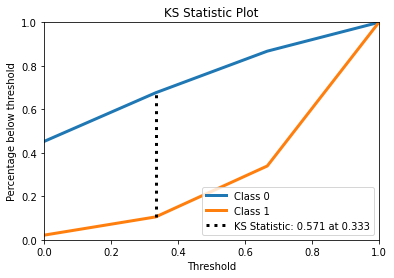

In [85]:
#KNN - ks_statistic
import scikitplot as skplt
target_proba = knn.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, target_proba)

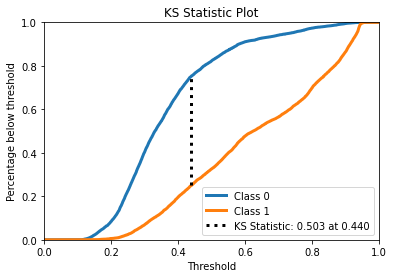

In [86]:
#Random_forest - ks_statistic
import scikitplot as skplt
target_proba = rf_grid.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, target_proba)

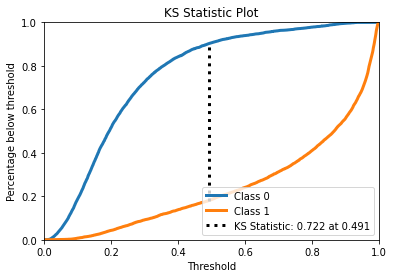

In [87]:
#XGB Classifier - ks_statistic
import scikitplot as skplt
target_proba = xg_grid.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, target_proba)

From the KS Statistic plot we got,
* we got best result of XGB Classifier KS Statistic 0.725 and Random forest KS Statistic 0.502.
* we got best result of precision, recall and KS Statistic as well.

## <font color=blue> 9. Feature Importance

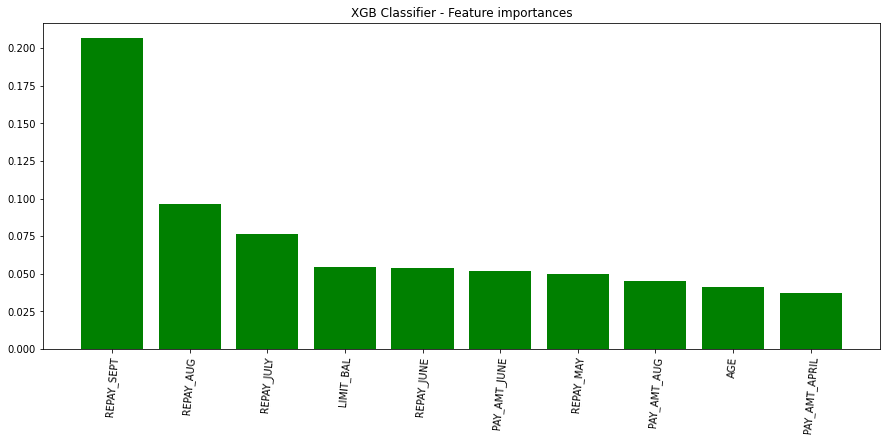

In [88]:
# XGB classifier Feature Importance
XGBClassifier=XGBClassifier().fit(X_train,y_train)
feature_importances_rf = pd.DataFrame(XGBClassifier.feature_importances_,
                        index = X.columns,columns=['importance_rf']).sort_values('importance_rf',ascending=False)[:10]
                                    
plt.subplots(figsize=(15,6))
plt.title("XGB Classifier - Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
plt.show()

From the important features, REPAY_SEPT is the most important feature to predict target variable. after that REPAY_AUG,REPAY_JULY etc.

## <font color=blue>10. Model Explainability

### <font color=green>Implementation of SHAP

In [89]:
#installing shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.4 MB/s 


In [90]:
#importing shap to do model Explainability
import shap 

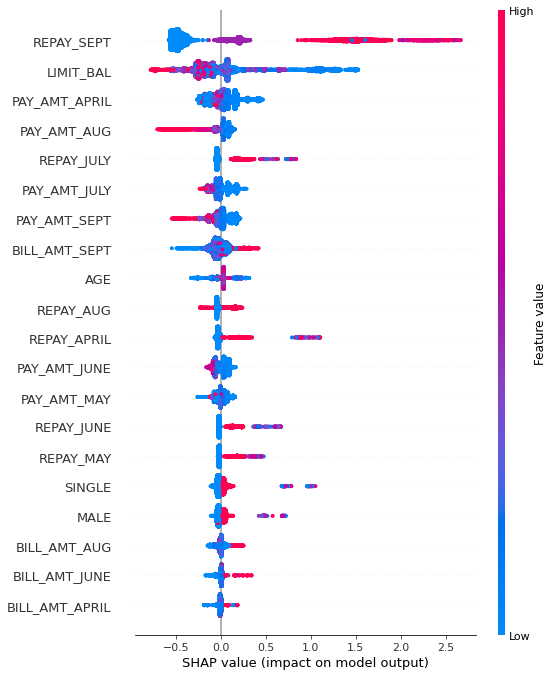

In [91]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(XGBClassifier).shap_values(X_test)
shap_values[0]
shap.summary_plot(shap_values, X_test)

In [92]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(XGBClassifier)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0]) 

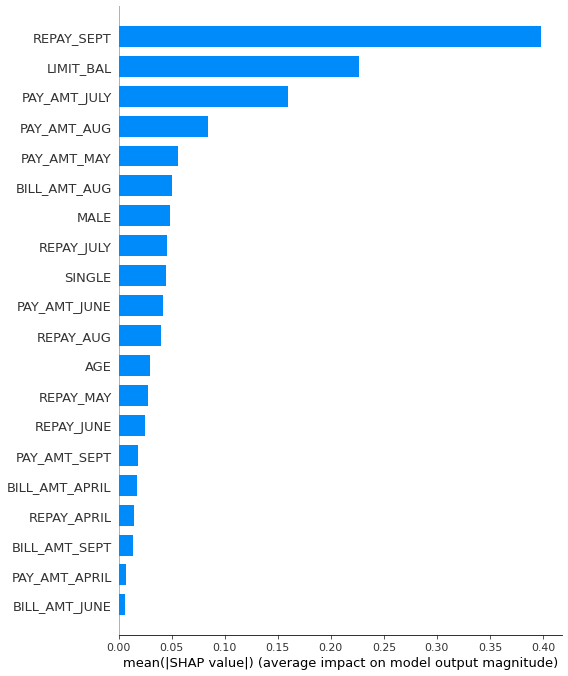

In [93]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

##<font color=red> Obervation:
* as per the shap technique repay_Sep and Limit _bal are the most importent feature to predict target variable.
* REPAY_SEP, LIMIT_BAL, PAY_AMT_JULY are the highly possitively correlated with target variable. PAY_AMT_AUG, SINGLE are the negatively correlated with target variable. 

# <b><font color=red>11. Summary and Conclusions:

* Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000. It might mean that credit card might be too easy to be issued for people who have low credit scores.
* The variance of the default rate for limit balance over 500,000 NTD is higher than other range of limit balance.
* It is lower default rate for cardholders have higher education level. Moreover, the default rate for clients whose age over 60 was higher than mid age and young people.
* As we have calculated Accuracy,Precision,Recall, f1_score and auc_roc_score for each model. Based on Precision and recall value will decide our model performance.
### <b>ML Model 
### <b>Logistic Regression:

* On Logistic Regression model, without hyperparameter tuning we got precision as 78% on training data and on test data 77%. Testing performance is good.
* after cross validation and hyper parameter tuning, we got precision as 79% on training data and on test data 78%. and recall value of 54%
### Support Vecctor Machine:
* On SVM model, without hyperparameter tuning we got precision as 77% on training data and on test data 76%. Testing performance is good.
### K-Nearest Neibours:
* On KNN model, without hyperparameter tuning we got precision as 79% on training data and 72% on test data. Testing performance very low compared to training data .So it was a overfitted model.
* After hyperparameter tuning we got precision as 84% on training data and 73% on test data same result. we will neglet this model.
### Random Forest:
* On Random Forest Classifier model, without hyperparameter tuning we got precision as 99% on training data and 85% on test data. Testing performance very low compared to training data .So it was a overfitted model.
* After hyperparameter tuning we got precision as 81% on training data and 79% on test data and recall value of 66% which is very good for us.
### XGB Classifier:
* On XGB Classifier model, without hyperparameter tuning we got precision as 84% on training data and 83% on test data. 
* After hyperparameter tuning  we got  precision as 94% on training data and 90% on test data and recall value of 81% which is very good for us.


Thus Random forest(GridSearchCV) and XGB Classifier gives good precision recall value and KS Statistic as well. We can deploy this models.

Feature Importance:
XG Boosting Classifier(GridSearchCV) have 'REPAY_SEP' is the most importance features then LIMIT_BAL, PAY_AMT_JULY. etc
# Thank You...